# Problem statement
## Your company has appointed you to create a ML model which should be able to predict the profit of the companies inorder to make the investment decision easier and faster using the dataset of the previous companies you have invested in.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/BJG Study Material/Resource Person/2020-21/rait/How Real Time Predictions are done with Machine Learning/programs/datasets/mlr_data.csv')
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [3]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [5]:
df.shape

(50, 5)

In [6]:
# extracting x and y
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# creating pairplots using matplotlib

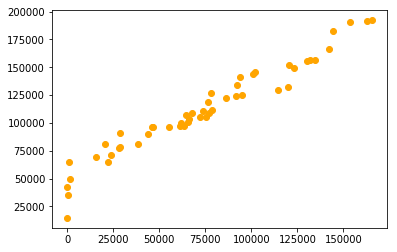

In [7]:
plt.scatter(x[:,0],y,c='orange')
plt.show()

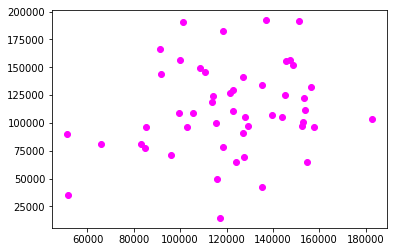

In [8]:
plt.scatter(x[:,1],y,c='magenta')
plt.show()

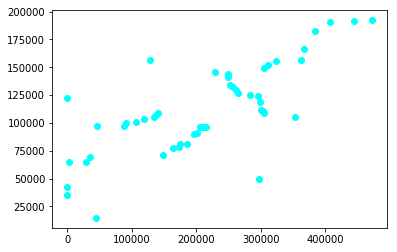

In [9]:
plt.scatter(x[:,2],y,c='cyan')
plt.show()

# creating pairplots using seaborn

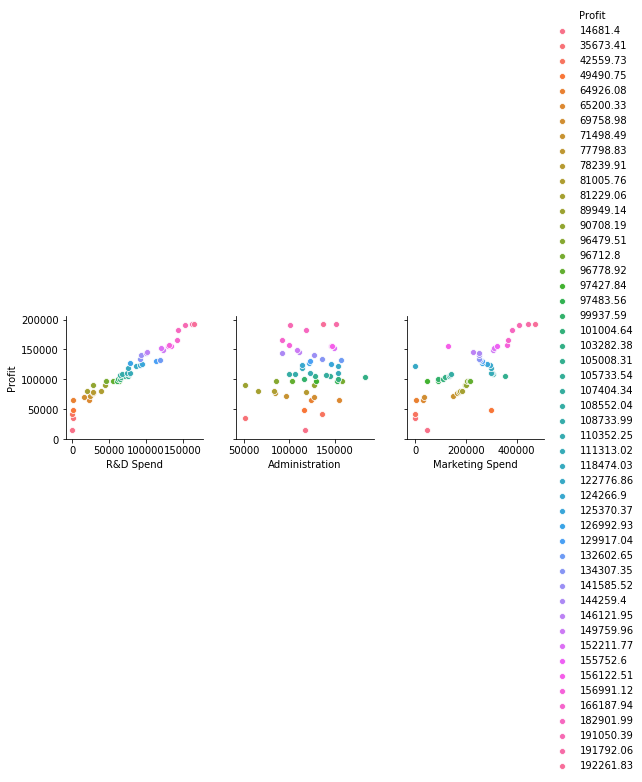

In [10]:
import seaborn as sns
# we give the dataframe as the input for the seasborn plots
sns.pairplot(df,x_vars=['R&D Spend','Administration','Marketing Spend'],y_vars='Profit',
            diag_kind=None,hue='Profit')
plt.show()

# assignment
## encode the categorical

In [11]:
# encoding the categorical values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],
                       remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [12]:
## split x and y into training and test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
## import the linear model and train it
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
## predict the output and calculate the errors and r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(x_te)
mae = mean_absolute_error(y_te,y_pred)
mse = mean_squared_error(y_te,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_te,y_pred)

In [15]:
print(mae)
print(mse)
print(rmse)
print(r2)

7024.539954003996
73809312.88228515
8591.234654127726
0.9315815199152208


In [16]:
lr.predict([[1,0,0,300000,300000,900000]])

array([319273.5046319])

In [17]:
lr.predict([[0,1,0,300000,300000,900000]])

array([318751.7172737])

In [18]:
lr.predict([[0,0,1,200000,900000,300000]])

array([248538.96750283])